### Importing basic libraries

In [34]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [35]:
#### Importing the training dataset
df=pd.read_excel(r'C:\Users\DELL\Downloads/car.xlsx')
df.head()

,Year of Manufraturing,Company name,Kilometer,Owner,Fuel type,Place,Price
0,2014,Maruti Alto K10,40562,1st,Petrol,New Delhi,292499
1,2015,Maruti Swift,89196,1st,Diesel,New Delhi,414499
2,2014,Maruti Swift Dzire,96978,1st,Diesel,New Delhi,424499
3,2017,Ford Figo Aspire,31724,1st,Petrol,New Delhi,473299
4,2013,Maruti Swift,114506,1st,Diesel,New Delhi,345499


In [36]:
### Checking the size of the datase
#df['Price']=df['Price'].astype(int)
df.dtypes

Year of Manufraturing     int64
Company name             object
Kilometer                 int64
Owner                    object
Fuel type                object
Place                    object
Price                     int64
dtype: object

In [37]:
### Checking the null values
df.isnull().sum()

Year of Manufraturing    0
Company name             0
Kilometer                0
Owner                    0
Fuel type                0
Place                    0
Price                    0
dtype: int64

In [38]:
### Checking the datatype
df.dtypes

Year of Manufraturing     int64
Company name             object
Kilometer                 int64
Owner                    object
Fuel type                object
Place                    object
Price                     int64
dtype: object

### There is no nulll values in the data set

### Most of the column has categorical values. So, I will Change it into intetger with Label Incoder

In [39]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['Year of Manufraturing', 'Company name', 'Owner', 'Fuel type', 'Place',]
df[col]= df[col].apply(le.fit_transform)

### Data Cleaning is done. Now proceed toward the EDA. 

## EDA

In [40]:
### Importing the basic libraries 
import matplotlib.pyplot as plt
import seaborn as sns

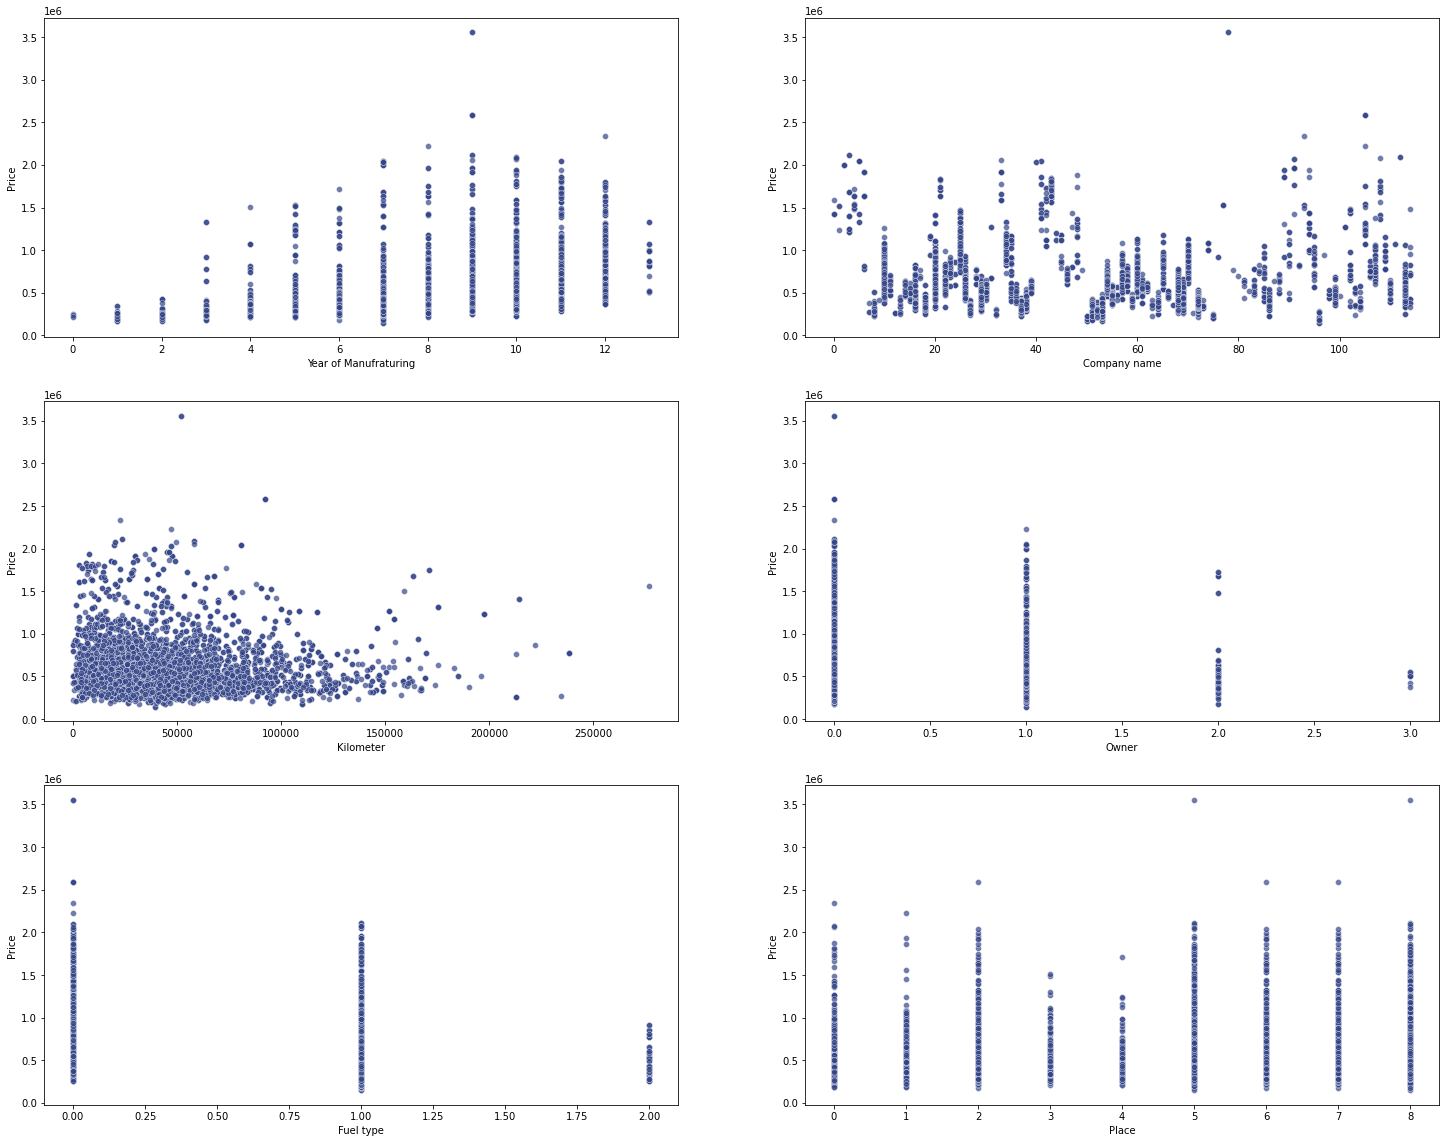

In [41]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='Price')
y=df['Price']
plt.figure(figsize=(25,20))
pn=1
for column in x:
    if pn <= 6:
        plt.subplot(3,2, pn)
        sns.scatterplot(x[column],y, alpha=0.7, color="#334488")
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

## Conclusion

### Year of maufracturing is putting good effect on used car price. Car price is less for old cars and high for recent years car.
### All companies has sales depanding on popularity. So, maruti suzuki has good sales compared to the other.
### price has directly relation with kilometer. The car which has low run has strong relation with price. The range between o-1.5k kilometer has more impact on price compared to the these car which has more kilometer range 1.5k.
### Car price are higher for 1st and 2nd owner cars.
### Price are higher for Petrol+Cng and petrol.
### Place has positive impact on proce but I can say price is not putting more impact on price approx all places has equal price.

<function matplotlib.pyplot.show(close=None, block=None)>

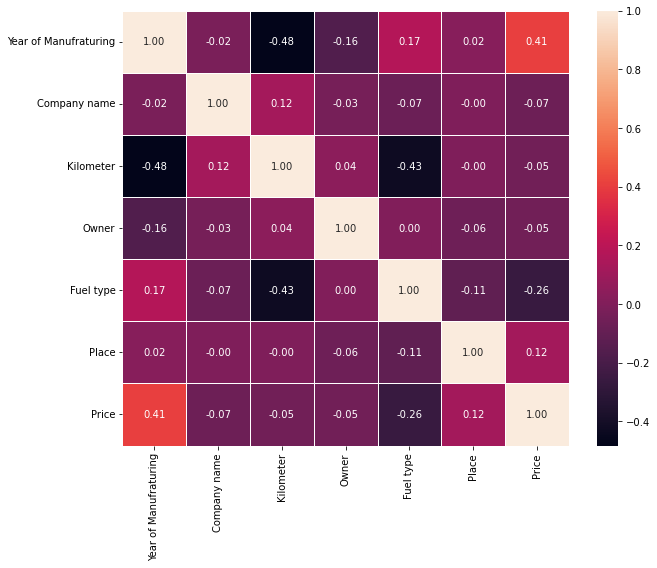

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### Conclusion - No feature has Multicolinearity with each other.

### Feature with maximum relation with traget - Year of Manufracturing (41%)
### Feature with minimum relation with traget - Owner and kilometer (-0.05%)

## Cheking the statistic of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

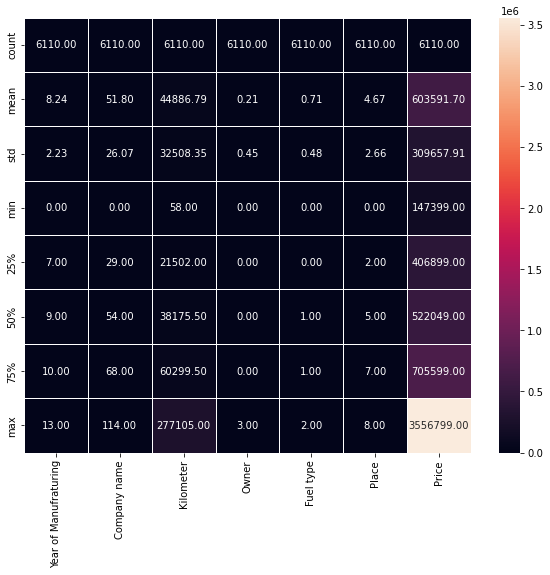

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### All statistic of the dataset seems normal expect maximum value fo price which has large difference between 75% to Max. I will check it again in the out liers.

### Distribution fo the values of the dataset

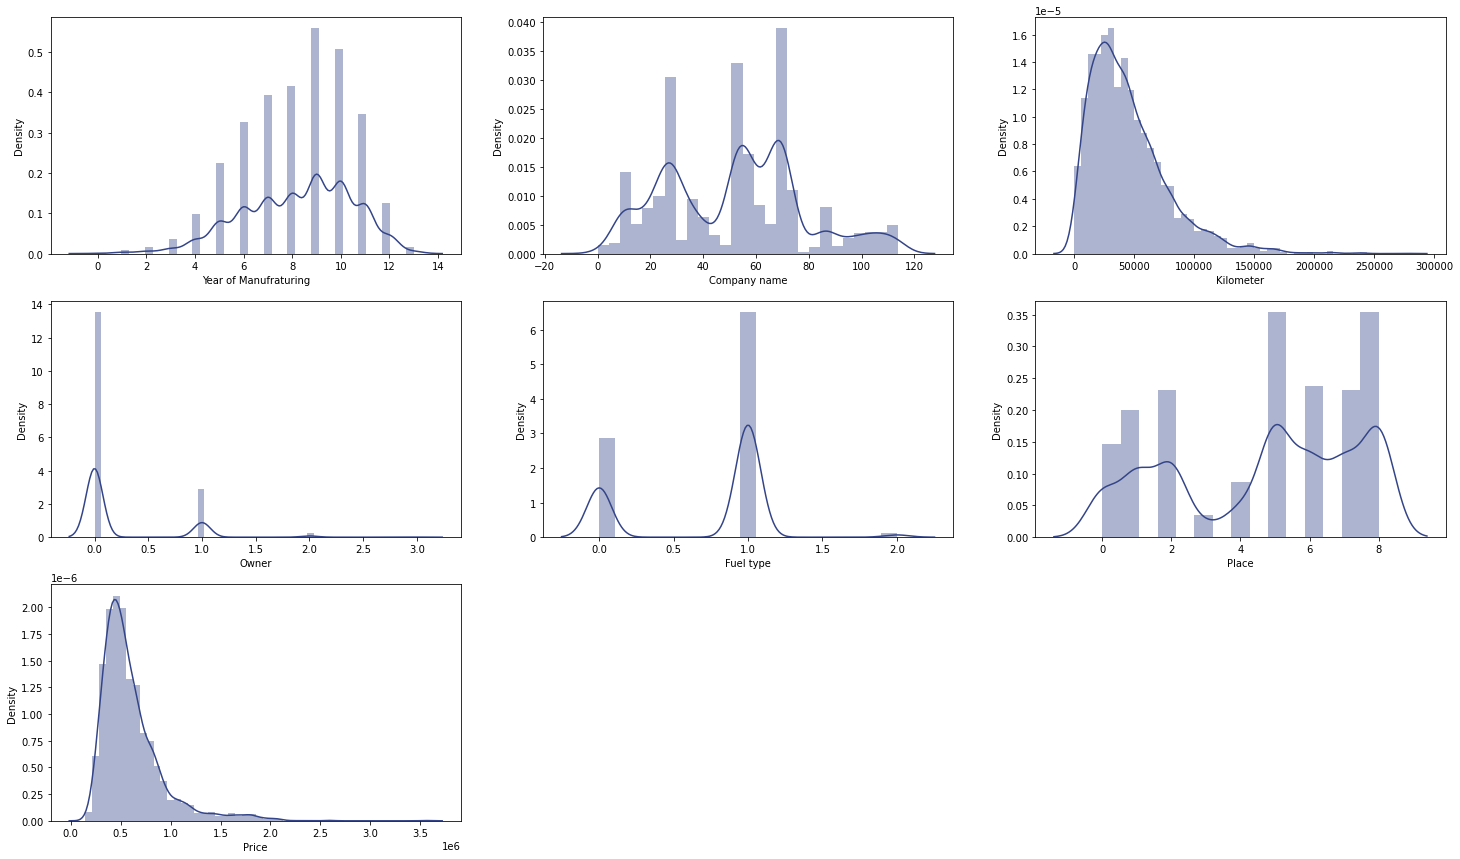

In [45]:
#### Plotting Distplot to check the distribution of the values
plt.figure(figsize=(25,20))
pn=1
for column in df:
    if pn <= 12:
        plt.subplot(4,3, pn)
        sns.distplot(df[column], color="#334488")
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### Most of the features are categorical values and price and kilometer column has some right skewness. 

### Now Checking the skewness.

In [46]:
df.skew()

Year of Manufraturing   -0.419334
Company name             0.238692
Kilometer                1.498440
Owner                    2.162135
Fuel type               -0.565482
Place                   -0.360859
Price                    2.214587
dtype: float64

#### Two feature has skewness but I am not going to remove this skewness. 

## Checking Outliers

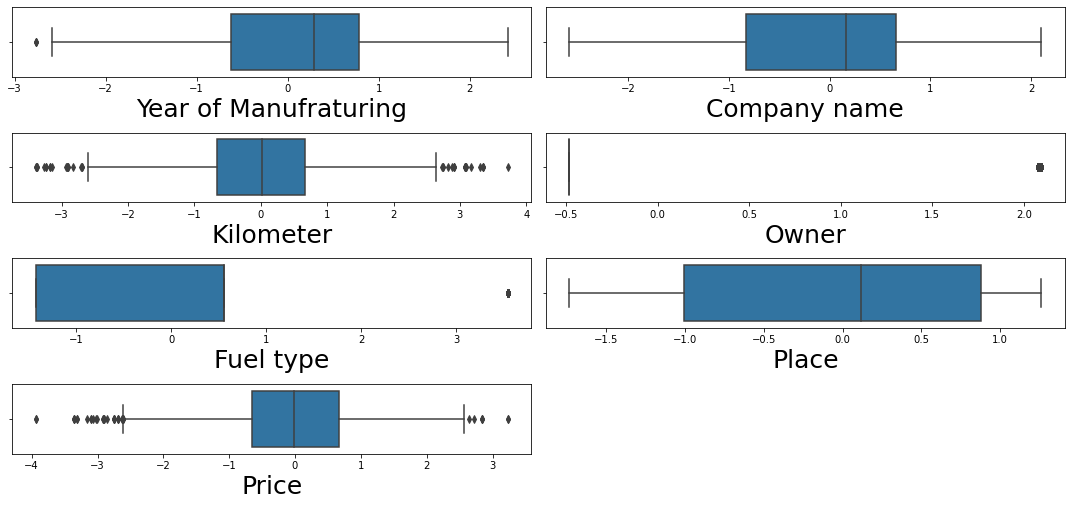

In [54]:
plt.figure(figsize=(15,10), facecolor='white')
pn = 1
for column in df_new:
    if pn <= 8:
        ax = plt.subplot(6,2, pn)
        sns.boxplot(df_new[column])
        plt.xlabel(column, fontsize =25)
    pn+=1
plt.tight_layout()

### Only 2 columns has outliers and we will remove these outliers.

In [55]:
df.shape

(6110, 7)

In [56]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([   0,    0,    0, ..., 6109, 6109, 6109], dtype=int64),
 array([0, 1, 2, ..., 4, 5, 6], dtype=int64))

In [58]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(5736, 7)

### Data Loss

In [59]:
### Dataloss
data_loss= (6110-5736)/6110*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 6.121112929623568


### Spliting the dataset in feature and target

In [60]:
x= df_new.drop(columns="Price")
y=df_new["Price"]

In [61]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [62]:
#### Splitting the dataset into traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

4588 4588 1148 1148


In [63]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [64]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 37.48124145150287 
 Cross Validation score  27.728660349389756 
Mean_absolute_error 134934.64462032236 
Mean_squared_error 36139425227.23567 
Root mean_squared_error 190103.72228663927


In [65]:
### Importing the GradientBoostingRegressor and checking the r2 score, cross validation and errors
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
r2_gbr =r2_score(y_test,pred_gbr)
scr = cross_val_score(gbr, x,y, cv=5)
Corss_gbr = scr.mean()
mae_gbr = mean_absolute_error(y_test,pred_gbr)
mse_gbr= mean_squared_error(y_test,pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gbr*100, '\n Cross Validation score ', Corss_gbr*100, '\nMean_absolute_error', mae_gbr,"\nMean_squared_error", mse_gbr, '\nRoot mean_squared_error', rmse_gbr )

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 79.89301343916908 
 Cross Validation score  72.92328469603412 
Mean_absolute_error 74818.80522634079 
Mean_squared_error 11622990510.864029 
Root mean_squared_error 107809.97407876523


In [66]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_scaled,y, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 50.14973919980306 
 Cross Validation score  38.323603177487634 
Mean_absolute_error 113781.9512195122 
Mean_squared_error 28816307530.313587 
Root mean_squared_error 169753.6672072612


In [67]:
### Importing the BayesianRidge and checking the score and r2 score
br= BayesianRidge()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
r2_br =r2_score(y_test,pred_br)
scr = cross_val_score(br, x,y, cv=5)
Corss_br = scr.mean()
mae_br = mean_absolute_error(y_test,pred_br)
mse_br= mean_squared_error(y_test,pred_br)
rmse_br= np.sqrt(mse_br)

print("\t\t\t BayesianRidge Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for BayesianRidge model', r2_br*100, '\n Cross Validation score ', Corss_br*100, '\nMean_absolute_error', mae_br,"\nMean_squared_error", mse_br, '\nRoot mean_squared_error', rmse_br)

			 BayesianRidge Model Accuracy and r2 score, cross validation and errors 

R2 score for BayesianRidge model 37.474190532216944 
 Cross Validation score  -7.979611392234354 
Mean_absolute_error 134928.17729524203 
Mean_squared_error 36143501062.65264 
Root mean_squared_error 190114.44201494174


In [68]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x_scaled,y, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model -4.962463187934318 
 Cross Validation score - -10.465287834869134 
Mean_absolute_error 183397.73289326878 
Mean_squared_error 60674318846.30752 
Root mean_squared_error 246321.57608765725


In [85]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_scaled,y, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 92.12563084752732 
 Cross Validation score  85.93525148101723 
Mean_absolute_error 39135.64719512196 
Mean_squared_error 4551836629.588327 
Root mean_squared_error 67467.30044687077


### I performed 6 model prediction Model Accuracy and r2 score, cross validation and errors are mentioned below - 

#### Accuracy score and cross validation score for LinearRegression model 37.48 and cross validation score is 27.72  
#### Accuracy score cross validation score for GradientBoostingRegressor model 79.89 and cross validation score is 72.92  
#### Accuracy score cross validation score for RandomForestRegressor model 91.90 and cross validation score is 86.24  
#### Accuracy score cross validation score  for BayesianRidge model 37.47 and cross validation score is -7.97  
#### Accuracy score cross validation score for KNeighborsRegressor model 50.14  and cross validation score is 38.32 
#### Accuracy score cross validation score  for SupportVectorRegressor model -4.96 and cross validation score is -10.46  

### From the above, I conclude that RandomForestRegressor is giving good result as compared to other 6 model and the difference between accuracy and R2 score is less of RandomForestRegressor. So, I will do hyperparameter tunning for RandomForestRegressor.

In [70]:
### Importing 
from sklearn.model_selection import GridSearchCV
rr = RandomForestRegressor()
para = {'n_estimators':range(1,5),
       'criterion':["mse", "mae"],
        'max_depth':range(1,6),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,10)}
grid =  GridSearchCV(rr, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [71]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 4}

In [84]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestRegressor(criterion='mse',max_depth= 20, min_samples_leaf= 5, min_samples_split=10,n_estimators=15)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
r2_rr=r2_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss_rr = scr.mean()
mae_rr= mean_absolute_error(y_test,pred_rr)
mse_rr= mean_squared_error(y_test,pred_rr)
rmse_rr= np.sqrt(mse_rr)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_rr*100, '\n Cross Validation score ', Corss_rr*100, '\nMean_absolute_error', mae_rr,"\nMean_squared_error", mse_rr, '\nRoot mean_squared_error', rmse_rr )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 86.77778563674653 
 Cross Validation score  80.45756988589187 
Mean_absolute_error 53765.60555257627 
Mean_squared_error 7643197632.413114 
Root mean_squared_error 87425.3832271447


### Conclusion - I tune the parameter of RandomForestRegressor and did not got the better result. I will go forward with Without tuning RandomForestRegressor model, which is 92.12563084752732 and Cross Validation score  85.93525148101723

### Saving model 

In [86]:
import joblib
joblib.dump(rr, 'Used_car_price_prediction')

['Used_car_price_prediction']